In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('maize_yield_dataset.csv')

In [4]:
df.head()

,Date,Region,Rainfall (mm),Temperature (°C),Soil Type,Soil pH,Soil Nutrients (N-P-K),Latitude,Longitude,Altitude (m),...,Pest & Disease Prevalence (%),Previous Year Yield (kg/ha),Maize Seed Variety,Market Price (KES/kg),Planting Density (plants/m²),Harvesting Date,Crop Health,Topography,Satellite Imagery,Price of Fertilizer (KES/kg)
0,2023-04-01,Kisumu,100,24.0,Clay,7.1,13-25-19,-3.7161,38.8936,2033,...,5,433,Hybrid-1,22.6,8,2023-07-15,Average,Wet,Flooded,155
1,2023-04-01,Nakuru,128,22.7,Sandy,5.7,38-50-16,0.8628,34.0661,1413,...,4,451,Hybrid-1,19.5,4,2023-07-15,Good,Flat,Normal,146
2,2023-04-01,Nairobi,38,23.8,Sandy,5.8,23-43-44,-0.1188,35.4335,1458,...,1,235,Hybrid-1,24.7,7,2023-07-15,Average,Flat,Normal,126
3,2023-04-01,Nairobi,144,21.0,Sandy,5.8,41-43-26,-1.8951,38.2712,2763,...,11,395,Local-1,18.8,7,2023-07-15,Average,Hilly,Normal,126
4,2023-04-01,Nakuru,140,22.6,Clay,6.3,42-11-38,2.9341,38.9073,2224,...,12,213,Hybrid-2,23.0,7,2023-07-15,Good,Flat,Flooded,156


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Soil Type']=label_encoder.fit_transform(df['Soil Type'])


In [20]:
x=df[['Rainfall (mm)','Temperature (°C)','Soil pH','Pest & Disease Prevalence (%)']]

In [21]:
x.head()

,Rainfall (mm),Temperature (°C),Soil pH,Pest & Disease Prevalence (%)
0,100,24.0,7.1,5
1,128,22.7,5.7,4
2,38,23.8,5.8,1
3,144,21.0,5.8,11
4,140,22.6,6.3,12


In [22]:
y=df['Previous Year Yield (kg/ha)']

In [23]:
y.head()

0    433
1    451
2    235
3    395
4    213
Name: Previous Year Yield (kg/ha), dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
print(y_pred)

[348.27458929 355.24758667 351.3925698  348.16221077 356.194629
 348.60490821 349.84425888 351.07331651 351.31222934 349.36375605
 348.87704256 355.71662262 352.90849271 350.79990202 347.07948245
 357.49896186 349.53461812 353.60742388 350.6586716  353.19878741
 355.71557645 350.33834059 353.51592311 348.77423003 349.40713186
 355.79364165 352.84572132 353.89919245 348.94837775 351.63221105
 350.70762279 347.75565488 347.33977971 349.99485914 352.07513627
 350.11261662 347.08929955 353.13393515 350.748664   348.93566701
 351.81365432 353.04228263 353.33132573 353.13391276 349.69309232
 349.70198967 351.96954599 354.00102677 349.08772828 346.60126865
 353.33858698 351.27472249 355.21490036 349.88780019 355.14125803
 348.97601893 349.64136387 351.68128026 355.33446236 348.72471985
 352.01019313 352.15751149 350.34064857 347.26390286 351.7002036
 354.43895032 349.22691956 351.67876298 349.49692841 349.73788655
 346.93976909 354.33128535 353.6249534  352.49804638 353.50488285
 354.81916729

In [28]:
r2=r2_score(y_test,y_pred)
print(r2)

-0.0031313248086715095


In [29]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

7368.820158193487


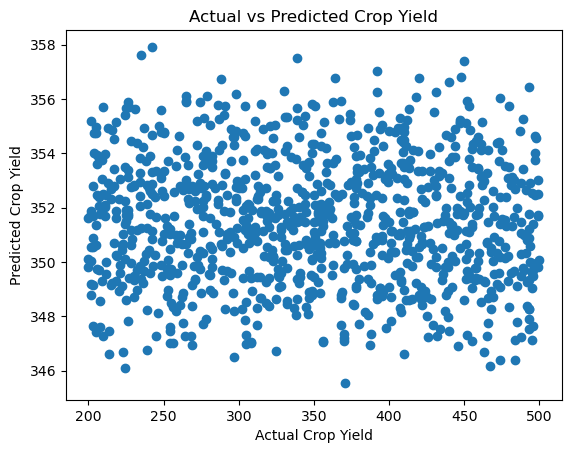

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()

In [31]:
correlation_coefficient = np.corrcoef(y_pred, y_test)[0, 1]

print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.032170104273008704


In [34]:
import joblib

In [36]:
with open('regressionModel.pkl', 'wb') as file:
    joblib.dump(model, file)